In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import load_img,img_to_array,array_to_img
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [11]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

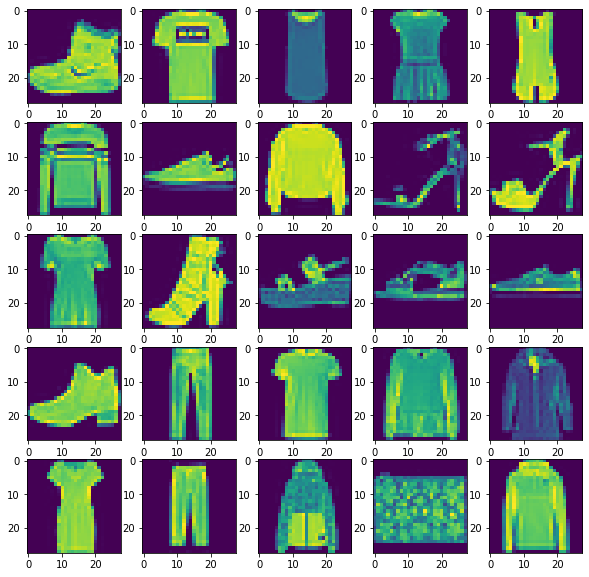

In [12]:
from numpy import subtract
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
plt.show()

In [13]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [14]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
938/938 [==============================] - 6s 6ms/step - loss: 0.5158 - accuracy: 0.8134 - val_loss: 0.4909 - val_accuracy: 0.8230
Epoch 2/100
938/938 [==============================] - 5s 6ms/step - loss: 0.3719 - accuracy: 0.8636 - val_loss: 0.4094 - val_accuracy: 0.8518
Epoch 3/100
938/938 [==============================] - 5s 5ms/step - loss: 0.3368 - accuracy: 0.8769 - val_loss: 0.3741 - val_accuracy: 0.8650
Epoch 4/100
938/938 [==============================] - 5s 6ms/step - loss: 0.3174 - accuracy: 0.8823 - val_loss: 0.3950 - val_accuracy: 0.8607
Epoch 5/100
938/938 [==============================] - 5s 6ms/step - loss: 0.3014 - accuracy: 0.8880 - val_loss: 0.3815 - val_accuracy: 0.8748
Epoch 6/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2908 - accuracy: 0.8925 - val_loss: 0.3577 - val_accuracy: 0.8786
Epoch 7/100
938/938 [==============================] - 6s 6ms/step - loss: 0.2819 - accuracy: 0.8960 - val_loss: 0.3782 - val_accuracy: 0.8748

Sai số kiểm tra là:  1.6637251377105713
Độ chính xác kiểm tra là:  0.8745999932289124


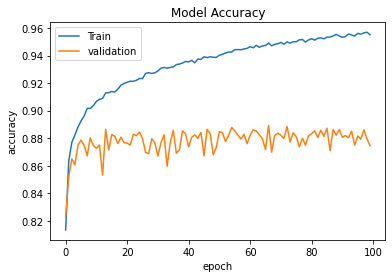

In [16]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [17]:
model.save('/content/drive/MyDrive/BT AI/fashion.h5')

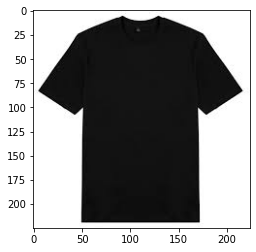

In [18]:
load_model('/content/drive/MyDrive/BT AI/fashion.h5')
url='/content/drive/MyDrive/Anh test/ao1.jpeg'
plt.imshow(load_img(url))


array([5])

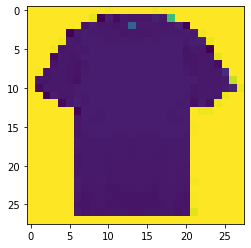

In [19]:
img=load_img('/content/drive/MyDrive/Anh test/ao1.jpeg',target_size=(28,28),color_mode="grayscale")
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,784)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)